# ARIMA model 

- Temperature Dataset

### Step 1: Importing neccesary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings("ignore")

### Step 2: Load the dataset

In [2]:
# Load the dataset
data = pd.read_csv('temperature.csv')
data

,Unnamed: 0,Datetime,Hourly_Temp
0,0,04-01-2022 00:00,20.867
1,1,04-01-2022 01:00,21.000
2,2,04-01-2022 02:00,20.867
3,3,04-01-2022 03:00,20.650
4,4,04-01-2022 04:00,20.400
...,...,...,...
7051,7051,24-10-2022 19:00,25.567
7052,7052,24-10-2022 20:00,25.183
7053,7053,24-10-2022 21:00,24.600
7054,7054,24-10-2022 22:00,23.986


### Step 3: Data Preprocessing

In [3]:
# Convert the 'Datetime' column to a datetime object
data['Datetime'] = pd.to_datetime(data['Datetime'], format='%d-%m-%Y %H:%M')

# Set the 'Datetime' column as the DataFrame index
data.set_index('Datetime', inplace=True)


### Step 4: Data Visualization

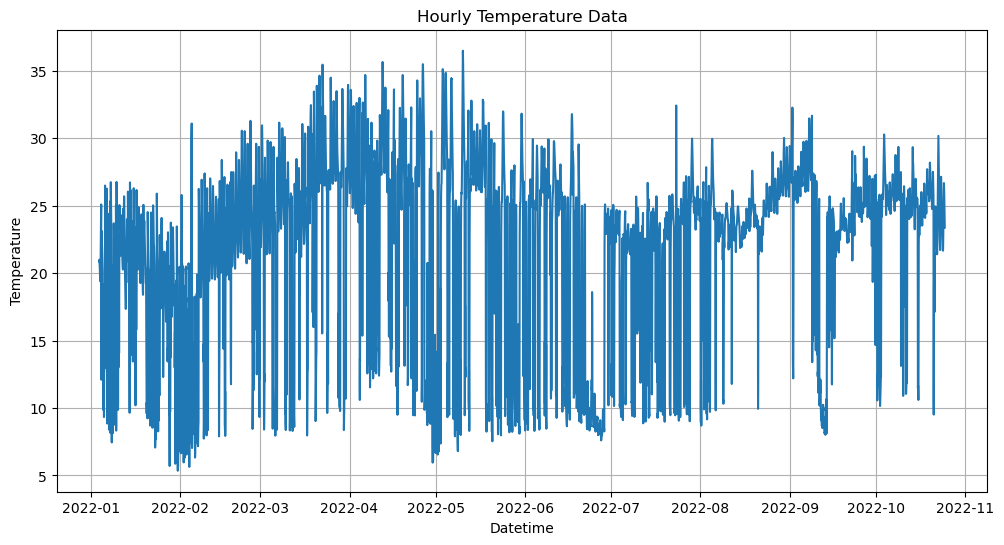

In [4]:
# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(data['Hourly_Temp'])
plt.title('Hourly Temperature Data')
plt.xlabel('Datetime')
plt.ylabel('Temperature')
plt.grid(True)
plt.show()


### Step 5: Check Stationarity

In [5]:
# Define a function to check stationarity and perform differencing
def test_stationarity(timeseries):
    # Dickey-Fuller test
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value

    return dfoutput

# Check stationarity
result = test_stationarity(data['Hourly_Temp'])
print("Augmented Dickey-Fuller Test:")
print(result)

Augmented Dickey-Fuller Test:
Test Statistic                -9.396891e+00
p-value                        6.338903e-16
#Lags Used                     2.500000e+01
Number of Observations Used    7.030000e+03
Critical Value (1%)           -3.431281e+00
Critical Value (5%)           -2.861951e+00
Critical Value (10%)          -2.566989e+00
dtype: float64


### Step 6: Perform Differencing

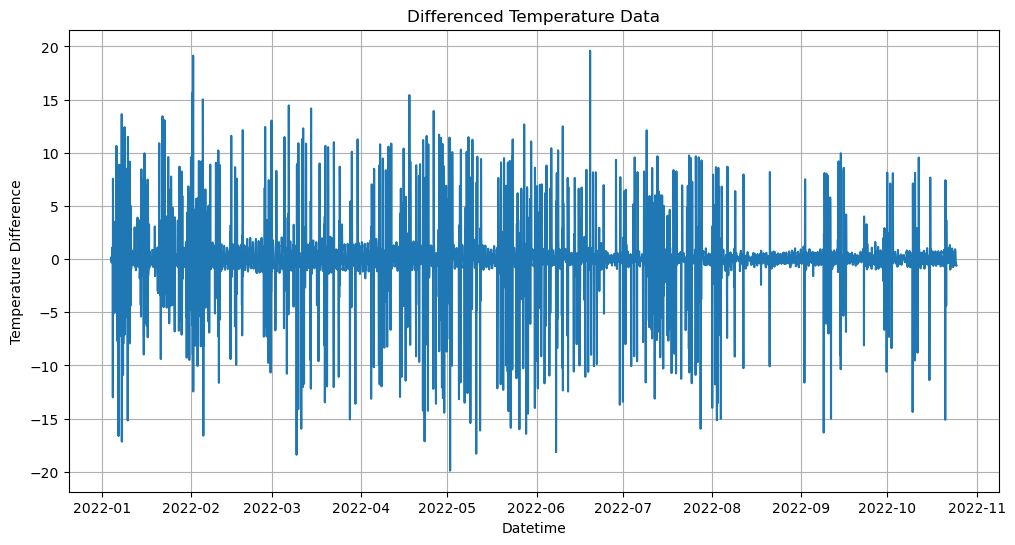

In [6]:
# Differencing to make the series stationary
data['Temp_Diff'] = data['Hourly_Temp'] - data['Hourly_Temp'].shift(1)
data.dropna(inplace=True)

# Plot differenced data
plt.figure(figsize=(12, 6))
plt.plot(data['Temp_Diff'])
plt.title('Differenced Temperature Data')
plt.xlabel('Datetime')
plt.ylabel('Temperature Difference')
plt.grid(True)
plt.show()

### Step 7: Check Stationarity of Differenced Data

In [7]:
# Check stationarity of differenced data
result = test_stationarity(data['Temp_Diff'])
print("Augmented Dickey-Fuller Test on Differenced Data:")
print(result)

Augmented Dickey-Fuller Test on Differenced Data:
Test Statistic                  -20.546080
p-value                           0.000000
#Lags Used                       35.000000
Number of Observations Used    7019.000000
Critical Value (1%)              -3.431282
Critical Value (5%)              -2.861952
Critical Value (10%)             -2.566989
dtype: float64


### Step 8: Fit SARIMA Model

In [8]:
# Fit SARIMA model
model = SARIMAX(data['Hourly_Temp'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 24))
results = model.fit(disp=False)

### Step 9: Forecast Future Values

In [9]:
# Forecast future values
forecast_steps = 24  # Adjust this as needed
forecast = results.get_forecast(steps=forecast_steps)
forecast


### Step 10: Create Date Range for Forecasting

In [10]:
# Create a date range for forecasting
date_range = pd.date_range(start=data.index[-1], periods=forecast_steps + 1, freq='H')
date_range

DatetimeIndex(['2022-10-24 23:00:00', '2022-10-25 00:00:00',
               '2022-10-25 01:00:00', '2022-10-25 02:00:00',
               '2022-10-25 03:00:00', '2022-10-25 04:00:00',
               '2022-10-25 05:00:00', '2022-10-25 06:00:00',
               '2022-10-25 07:00:00', '2022-10-25 08:00:00',
               '2022-10-25 09:00:00', '2022-10-25 10:00:00',
               '2022-10-25 11:00:00', '2022-10-25 12:00:00',
               '2022-10-25 13:00:00', '2022-10-25 14:00:00',
               '2022-10-25 15:00:00', '2022-10-25 16:00:00',
               '2022-10-25 17:00:00', '2022-10-25 18:00:00',
               '2022-10-25 19:00:00', '2022-10-25 20:00:00',
               '2022-10-25 21:00:00', '2022-10-25 22:00:00',
               '2022-10-25 23:00:00'],
              dtype='datetime64[ns]', freq='h')

### Step 11: Get Forecasted Values and Confidence Intervals

In [11]:
# Get forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()
forecast_values

2022-10-25 00:00:00    23.352777
2022-10-25 01:00:00    23.050825
2022-10-25 02:00:00    21.575433
2022-10-25 03:00:00    21.395748
2022-10-25 04:00:00    21.940353
2022-10-25 05:00:00    22.190754
2022-10-25 06:00:00    22.295171
2022-10-25 07:00:00    22.326694
2022-10-25 08:00:00    22.356283
2022-10-25 09:00:00    22.387703
2022-10-25 10:00:00    22.057932
2022-10-25 11:00:00    21.804275
2022-10-25 12:00:00    21.386959
2022-10-25 13:00:00    21.517700
2022-10-25 14:00:00    21.608790
2022-10-25 15:00:00    22.071177
2022-10-25 16:00:00    22.636474
2022-10-25 17:00:00    22.907399
2022-10-25 18:00:00    22.774969
2022-10-25 19:00:00    22.996494
2022-10-25 20:00:00    23.130924
2022-10-25 21:00:00    23.533590
2022-10-25 22:00:00    23.395765
2022-10-25 23:00:00    23.221286
Freq: h, Name: predicted_mean, dtype: float64

In [12]:
forecast_conf_int

,lower Hourly_Temp,upper Hourly_Temp
2022-10-25 00:00:00,18.000930,28.704624
2022-10-25 01:00:00,15.215404,30.886245
2022-10-25 02:00:00,11.897755,31.253112
2022-10-25 03:00:00,10.171792,32.619704
2022-10-25 04:00:00,9.359000,34.521706
2022-10-25 05:00:00,8.384797,35.996710
2022-10-25 06:00:00,7.364721,37.225621
2022-10-25 07:00:00,6.350704,38.302685
2022-10-25 08:00:00,5.399096,39.313470
2022-10-25 09:00:00,4.503070,40.272337


### Step 12: Create a Forecast DataFrame

In [13]:
# Create a forecast DataFrame
forecast_df = pd.DataFrame({'Forecast': forecast_values, 'Lower_CI': forecast_conf_int.iloc[:, 0], 'Upper_CI': forecast_conf_int.iloc[:, 1]}, index=date_range[1:])
forecast_df

,Forecast,Lower_CI,Upper_CI
2022-10-25 00:00:00,23.352777,18.000930,28.704624
2022-10-25 01:00:00,23.050825,15.215404,30.886245
2022-10-25 02:00:00,21.575433,11.897755,31.253112
2022-10-25 03:00:00,21.395748,10.171792,32.619704
2022-10-25 04:00:00,21.940353,9.359000,34.521706
2022-10-25 05:00:00,22.190754,8.384797,35.996710
2022-10-25 06:00:00,22.295171,7.364721,37.225621
2022-10-25 07:00:00,22.326694,6.350704,38.302685
2022-10-25 08:00:00,22.356283,5.399096,39.313470
2022-10-25 09:00:00,22.387703,4.503070,40.272337


### Step 13: Plot the Original Data and the Forecast

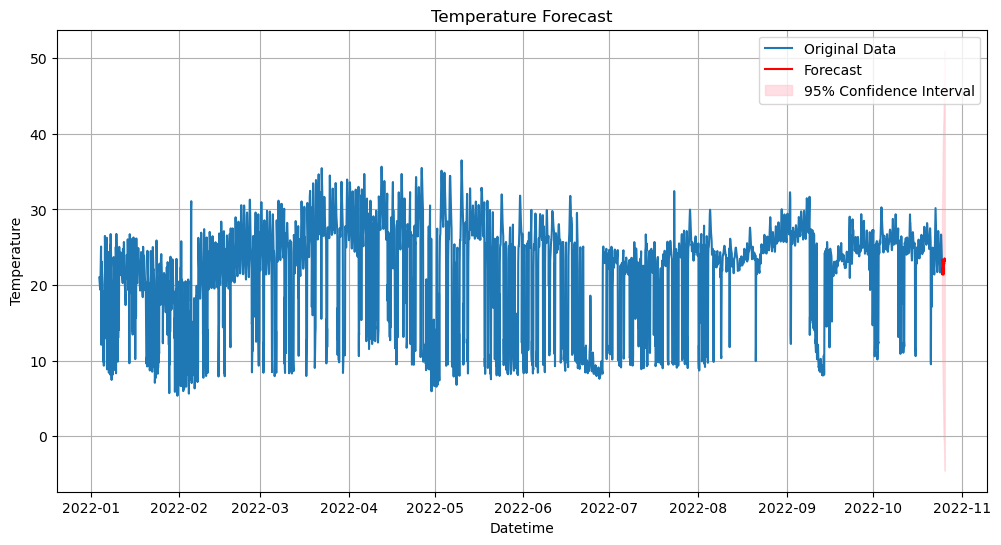

In [14]:
# Plot the original data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(data['Hourly_Temp'], label='Original Data')
plt.plot(forecast_df['Forecast'], label='Forecast', color='red')
plt.fill_between(forecast_df.index, forecast_df['Lower_CI'], forecast_df['Upper_CI'], color='pink', alpha=0.5, label='95% Confidence Interval')
plt.title('Temperature Forecast')
plt.xlabel('Datetime')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.show()